In [38]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import pytesseract
import cv2

# API connexion

In [10]:
api_url = "https://invoiceocrp3.azurewebsites.net/invoices"

content_url = requests.get(api_url)

In [12]:
content_url.status_code

200

In [13]:
content_url.headers

{'Content-Length': '80052', 'Content-Type': 'text/html; charset=utf-8', 'Date': 'Tue, 19 Mar 2024 13:19:58 GMT', 'Server': 'uvicorn', 'Set-Cookie': 'ARRAffinity=d85728161905173539ecf54807b1666ca887e36ad935b5ba7761a6ecf8e0f145;Path=/;HttpOnly;Secure;Domain=invoiceocrp3.azurewebsites.net, ARRAffinitySameSite=d85728161905173539ecf54807b1666ca887e36ad935b5ba7761a6ecf8e0f145;Path=/;HttpOnly;SameSite=None;Secure;Domain=invoiceocrp3.azurewebsites.net'}

In [14]:
requests.codes.ok

200

In [16]:
content_url.text

"<html><body><h2>Invoices</h2><ul><li><a href='/invoices/FAC_2019_0002'>FAC_2019_0002</a> 2019-01-01 03:29:00</li><li><a href='/invoices/FAC_2019_0001'>FAC_2019_0001</a> 2019-01-01 08:21:00</li><li><a href='/invoices/FAC_2019_0003'>FAC_2019_0003</a> 2019-01-02 01:05:00</li><li><a href='/invoices/FAC_2019_0004'>FAC_2019_0004</a> 2019-01-02 07:27:00</li><li><a href='/invoices/FAC_2019_0006'>FAC_2019_0006</a> 2019-01-03 14:19:00</li><li><a href='/invoices/FAC_2019_0005'>FAC_2019_0005</a> 2019-01-03 22:10:00</li><li><a href='/invoices/FAC_2019_0007'>FAC_2019_0007</a> 2019-01-04 00:13:00</li><li><a href='/invoices/FAC_2019_0009'>FAC_2019_0009</a> 2019-01-04 09:29:00</li><li><a href='/invoices/FAC_2019_0008'>FAC_2019_0008</a> 2019-01-04 23:49:00</li><li><a href='/invoices/FAC_2019_0011'>FAC_2019_0011</a> 2019-01-05 03:18:00</li><li><a href='/invoices/FAC_2019_0010'>FAC_2019_0010</a> 2019-01-05 03:29:00</li><li><a href='/invoices/FAC_2019_0013'>FAC_2019_0013</a> 2019-01-05 15:40:00</li><li><a

In [18]:
soup = BeautifulSoup(content_url.text, 'html.parser')

group_list = soup.findAll('li')
for weblink in group_list:
    url= weblink.findAll('a')
    print(url)


[<a href="/invoices/FAC_2019_0002">FAC_2019_0002</a>]
[<a href="/invoices/FAC_2019_0001">FAC_2019_0001</a>]
[<a href="/invoices/FAC_2019_0003">FAC_2019_0003</a>]
[<a href="/invoices/FAC_2019_0004">FAC_2019_0004</a>]
[<a href="/invoices/FAC_2019_0006">FAC_2019_0006</a>]
[<a href="/invoices/FAC_2019_0005">FAC_2019_0005</a>]
[<a href="/invoices/FAC_2019_0007">FAC_2019_0007</a>]
[<a href="/invoices/FAC_2019_0009">FAC_2019_0009</a>]
[<a href="/invoices/FAC_2019_0008">FAC_2019_0008</a>]
[<a href="/invoices/FAC_2019_0011">FAC_2019_0011</a>]
[<a href="/invoices/FAC_2019_0010">FAC_2019_0010</a>]
[<a href="/invoices/FAC_2019_0013">FAC_2019_0013</a>]
[<a href="/invoices/FAC_2019_0012">FAC_2019_0012</a>]
[<a href="/invoices/FAC_2019_0017">FAC_2019_0017</a>]
[<a href="/invoices/FAC_2019_0014">FAC_2019_0014</a>]
[<a href="/invoices/FAC_2019_0016">FAC_2019_0016</a>]
[<a href="/invoices/FAC_2019_0015">FAC_2019_0015</a>]
[<a href="/invoices/FAC_2019_0018">FAC_2019_0018</a>]
[<a href="/invoices/FAC_2019

# Invoice access

In [35]:
pytesseract.__version__

'0.3.10'

In [24]:
invoice_url = "https://invoiceocrp3.azurewebsites.net/static/FAC_2019_0001.png"

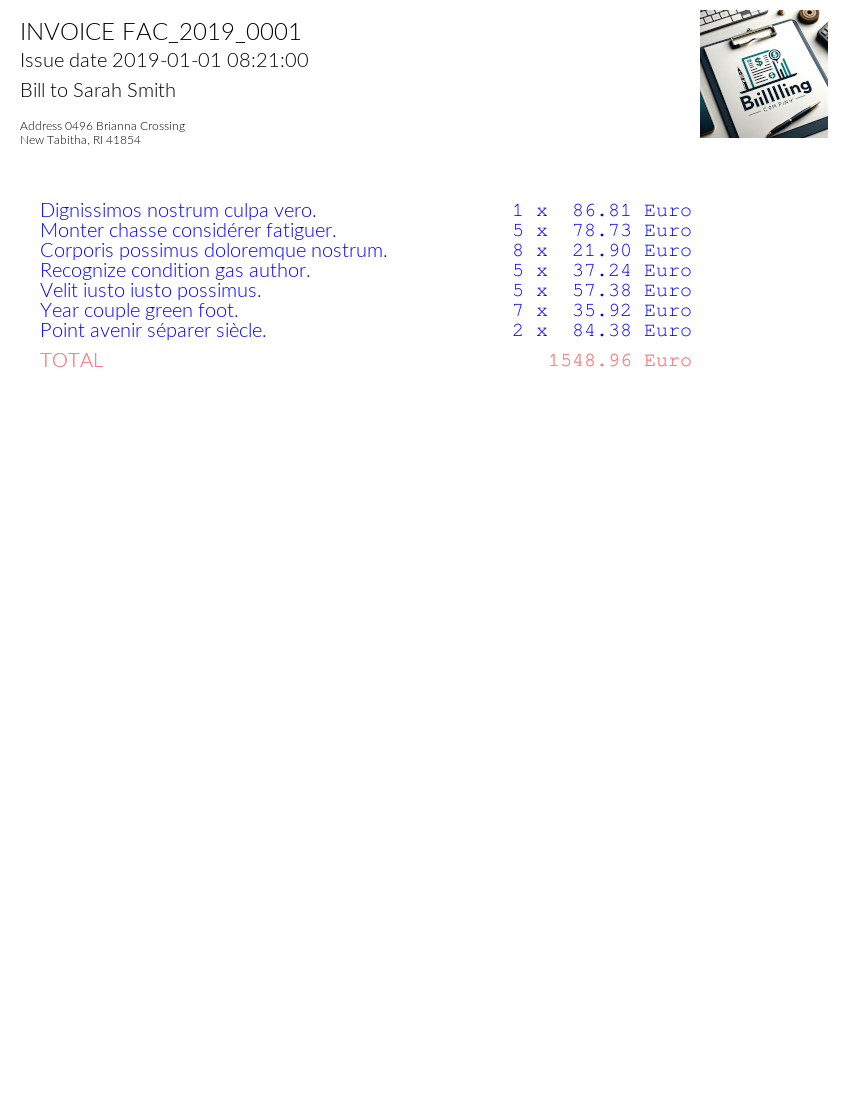

In [40]:
response = requests.get(invoice_url)
img = Image.open(BytesIO(response.content))
img

In [36]:
print(pytesseract.image_to_string(Image.open(invoice_url)))

OSError: [Errno 22] Invalid argument: 'https://invoiceocrp3.azurewebsites.net/static/FAC_2019_0001.png'

In [23]:
#invoice_url = "https://invoiceocrp3.azurewebsites.net/static/FAC_2019_0001.png"
#image = Image.open(invoice_url)

OSError: [Errno 22] Invalid argument: 'https://invoiceocrp3.azurewebsites.net/static/FAC_2019_0001.png'

In [27]:
img = cv2.imread(invoice_url)

In [32]:
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

TypeError: Unsupported image object

In [31]:
img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [28]:
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

AttributeError: 'NoneType' object has no attribute 'shape'